In [1]:
import libkdv
import pandas as pd
import numpy as np


KDV of xy

In [2]:
def measure(n):
    "Measurement model, return two coupled measurements."
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1+m2, m1-m2

In [3]:
m1, m2 = measure(2000)
df = pd.DataFrame({'x':m1,'y':m2})

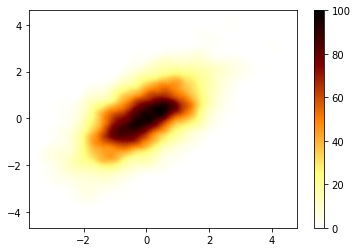

In [4]:
kdv = libkdv.kdv(df,GPS=False,bandwidth_s=0.5)
result = kdv.compute()
kdv.plot()

KDV of Geo data

In [5]:
NewYork = pd.read_csv('New_York_Crashes_raw.csv')
center_NewYork = [40.730610,-73.935242]
attr_name_NewYork = ['LATITUDE','LONGITUDE','CRASH DATE']

df = libkdv.utils.gps_data_processing(NewYork,center_NewYork,attr_name_NewYork,tolerance = 0.3 )
df

C:\Users\www1n\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,lat,lon,t
0,40.599945,-73.946370,1559520000
2,40.595715,-73.965080,1560297600
3,40.642384,-73.925390,1561334400
4,40.580360,-73.967610,1559606400
5,40.630005,-74.010160,1561334400
...,...,...,...
1705600,40.621860,-74.072063,1388707200
1705601,40.678639,-73.973508,1389052800
1705602,40.770675,-73.735493,1388966400
1705603,40.763622,-73.721918,1388880000


In [6]:
kdv_NewYork = libkdv.kdv(df, KDV_type='KDV',
                 bandwidth_s=1000, row_pixels=800, col_pixels=600,t_pixels = 128)


In [7]:
kdv_NewYork.compute()

,lon,lat,val
0,-74.235190,40.501762,0.497028
1,-74.235190,40.502449,0.592044
2,-74.235190,40.503135,0.700396
3,-74.235190,40.503821,0.807795
4,-74.235190,40.504508,0.901374
...,...,...,...
211652,-73.684494,40.738552,0.178209
211653,-73.684494,40.739238,0.182488
211654,-73.684494,40.739925,0.172181
211655,-73.684494,40.740611,0.155854


In [8]:
map1 = kdv_NewYork.plot()
map1
#Suggested Color: ['#0000ff', '#007fff', '#00ffff', '#00ff80', '#00ff00', '#80ff00', '#ffff00', '#ff8000', '#ff0000', '#ff0000', '#ff0000', '#ff0000']
#Suggested Color Scale: quantize

KeplerGl(data={'data_1': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, …

STKDV of Geo data

In [9]:
ST_kdv_NewYork = libkdv.kdv(df,KDV_type='STKDV',bandwidth_s=1062,
                            row_pixels=128,col_pixels=128,bandwidth_t=10,
                            num_threads=16,t_pixels=128)

In [10]:
#Takes around 5 mins to compute the result
ST_kdv_NewYork.compute()
ST_kdv_NewYork.result.to_csv('ST_NY_result.csv',index=False)

,lon,lat,val,t
0,-74.23519,40.501762,0.352492,1343110275
1,-74.23519,40.501762,1.095108,1345119750
2,-74.23519,40.501762,0.222585,1347129225
3,-74.23519,40.501762,0.771747,1355167125
4,-74.23519,40.501762,0.157688,1359186075
...,...,...,...,...
894713,-73.66748,40.733018,0.361582,1463678774
894714,-73.66748,40.736230,0.670559,1463678774
894715,-73.66748,40.739442,0.790573,1463678774
894716,-73.66748,40.742654,0.721622,1463678774


In [15]:
map2 = ST_kdv_NewYork.plot()
map2
#Suggested Color: ['#0000ff', '#007fff', '#00ffff', '#00ff80', '#00ff00', '#80ff00', '#ffff00', '#ff8000', '#ff0000', '#ff0000', '#ff0000', '#ff0000']
#Suggested Color Scale: quantize

KeplerGl(data={'data_1': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, …

In [18]:
#save the STKDV_result so that you can reproduce the map without computing
result = pd.read_csv('ST_NY_result.csv')
config_ST_NY = {'version': 'v1', 'config': {'visState': {'filters': [{'dataId': ['data_1'], 'id': 'il25jwfnr', 'name': ['t'], 'type': 'timeRange', 'value': [1341100800000, 1344979270000], 'enlarged': False, 'plotType': 'histogram', 'animationWindow': 'free', 'yAxis': None, 'speed': 1}], 'layers': [{'id': 'yaru41a', 'type': 'point', 'config': {'dataId': 'data_1', 'label': 'Point', 'color': [34, 63, 154], 'highlightColor': [252, 242, 26, 255], 'columns': {'lat': 'lat', 'lng': 'lon', 'altitude': None}, 'isVisible': True, 'visConfig': {'radius': 10, 'fixedRadius': False, 'opacity': 0.8, 'outline': False, 'thickness': 2, 'strokeColor': None, 'colorRange': {'name': 'Custom Palette', 'type': 'custom', 'category': 'Custom', 'colors': ['#0000FF', '#007FFF', '#00FFFF', '#00FF80', '#00FF00', '#80FF00', '#FFFF00', '#FF8000', '#FF0000', '#FF0000', '#FF0000', '#FF0000']}, 'strokeColorRange': {'name': 'Global Warming', 'type': 'sequential', 'category': 'Uber', 'colors': ['#5A1846', '#900C3F', '#C70039', '#E3611C', '#F1920E', '#FFC300']}, 'radiusRange': [0, 50], 'filled': True}, 'hidden': False, 'textLabel': [{'field': None, 'color': [255, 255, 255], 'size': 18, 'offset': [0, 0], 'anchor': 'start', 'alignment': 'center'}]}, 'visualChannels': {'colorField': {'name': 'val', 'type': 'real'}, 'colorScale': 'quantize', 'strokeColorField': None, 'strokeColorScale': 'quantile', 'sizeField': None, 'sizeScale': 'linear'}}], 'interactionConfig': {'tooltip': {'fieldsToShow': {'data_1': [{'name': 'val', 'format': None}, {'name': 't', 'format': None}]}, 'compareMode': False, 'compareType': 'absolute', 'enabled': True}, 'brush': {'size': 0.5, 'enabled': False}, 'geocoder': {'enabled': False}, 'coordinate': {'enabled': False}}, 'layerBlending': 'normal', 'splitMaps': [], 'animationConfig': {'currentTime': None, 'speed': 1}}, 'mapState': {'bearing': 0, 'dragRotate': False, 'latitude': 40.717414764970975, 'longitude': -73.88441287419872, 'pitch': 0, 'zoom': 9, 'isSplit': False}, 'mapStyle': {'styleType': 'dark', 'topLayerGroups': {}, 'visibleLayerGroups': {'label': True, 'road': True, 'border': False, 'building': True, 'water': True, 'land': True, '3d building': False}, 'threeDBuildingColor': [9.665468314072013, 17.18305478057247, 31.1442867897876], 'mapStyles': {}}}}
map_2 = libkdv.plot(result,config_ST_NY)
map_2

KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [{'dataId': ['data_1'], 'id': 'il25jwfnr'…